# **SPARKS FOUNDATION TASK 5- EXPLORATORY DATA ANALYSIS-SPORTS**

# Name: ARANYA CHANDRA

## **IPL DATA ANALYSIS**

## **Importing Packages**


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## **Importing Datasets**

In [ ]:
df_matches=pd.read_csv("matches.csv")


In [ ]:
df_matches.head(5)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


**Data cleansing by removing columns with null values**

In [ ]:
df_matches.drop('umpire3',inplace=True,axis=1)

In [ ]:
df_delivery=pd.read_csv('deliveries.csv')

## **Displaying Datasets**

In [ ]:
df_matches.head(5)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN


In [ ]:
df_delivery.head(5)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


# **Teams with Maximum Victories**

In [ ]:
df_matches['winner'].value_counts()

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

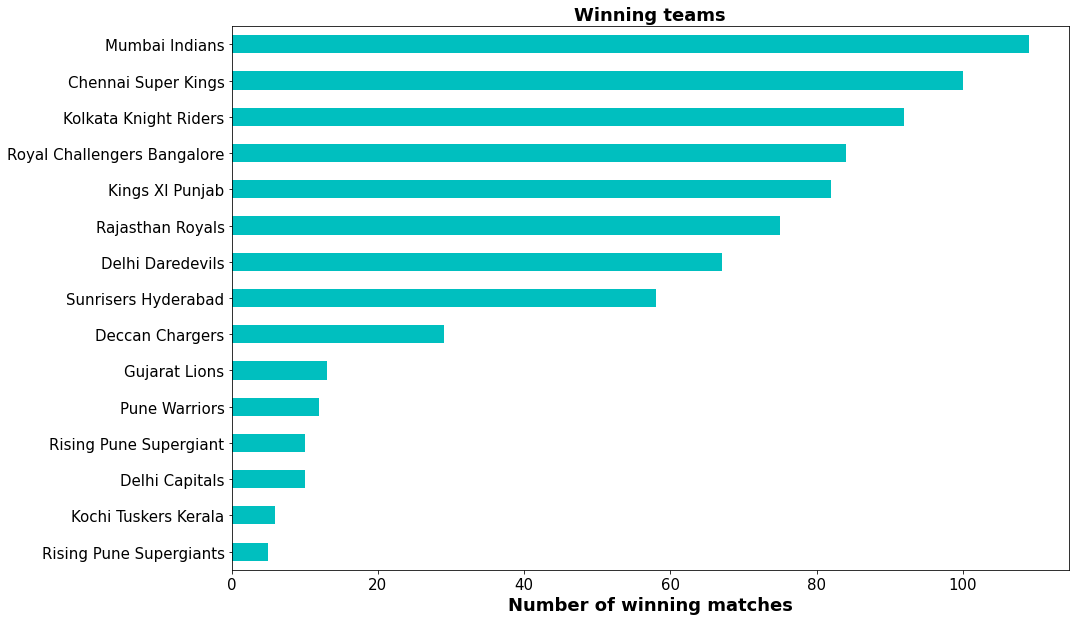

In [ ]:
plot1=df_matches['winner'].value_counts().plot(kind='barh',figsize=(15,10),color='c',fontsize=15)
plot1.set_title('Winning teams',fontsize=18,fontweight='bold')
plot1.set_xlabel('Number of winning matches',fontsize=18,fontweight='bold')
plot1.invert_yaxis()

# Which Team is more Consistent CSK Vs MI?

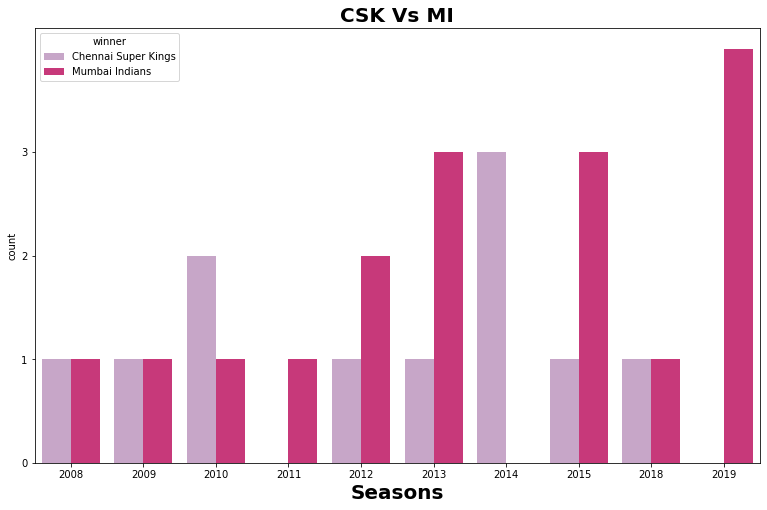

In [ ]:
def team_comparison(team1,team2):
    compare = df_matches[((df_matches['team1']==team1) | (df_matches['team2']==team1)) & ((df_matches['team1']==team2) | (df_matches['team2']==team2))]
    plt.subplots(figsize=(13,8))
    plt.yticks(np.arange(0,4,1))
    plot10 = sns.countplot(x='season', hue='winner',data = compare,palette='PuRd')
    plot10.set_title("CSK Vs MI",fontsize=20,fontweight='bold')
    plot10.set_xlabel('Seasons',fontsize=20,fontweight='bold')
team_comparison('Mumbai Indians','Chennai Super Kings')

In [ ]:
df_matches['win_by_runs'].max()

146

In [ ]:
df_matches.iloc[df_matches['win_by_runs'].idxmax()]['winner']

'Mumbai Indians'

In [ ]:
df_matches['win_by_wickets'].max()

10

In [ ]:
df_matches.iloc[df_matches['win_by_wickets'].idxmax()]['winner']

'Kolkata Knight Riders'

In [ ]:
winteam=df_matches[['season','winner']]
winteam

,season,winner
0,2017,Sunrisers Hyderabad
1,2017,Rising Pune Supergiant
2,2017,Kolkata Knight Riders
3,2017,Kings XI Punjab
4,2017,Royal Challengers Bangalore
...,...,...
751,2019,Mumbai Indians
752,2019,Mumbai Indians
753,2019,Delhi Capitals
754,2019,Chennai Super Kings


In [ ]:
maxwinteam={}
for i in sorted(winteam.season.unique()):
  maxwinteam[i]=winteam[winteam.season==i]['winner'].tail(1).values[0]
season_winteam=pd.Series(maxwinteam)
season_winteam=pd.DataFrame(season_winteam,columns=['Season_Winner'])

season_winteam

,Season_Winner
2008,Rajasthan Royals
2009,Deccan Chargers
2010,Chennai Super Kings
2011,Chennai Super Kings
2012,Kolkata Knight Riders
2013,Mumbai Indians
2014,Kolkata Knight Riders
2015,Mumbai Indians
2016,Sunrisers Hyderabad
2017,Mumbai Indians


In [ ]:
season_winteam.index

Int64Index([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
            2019],
           dtype='int64')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


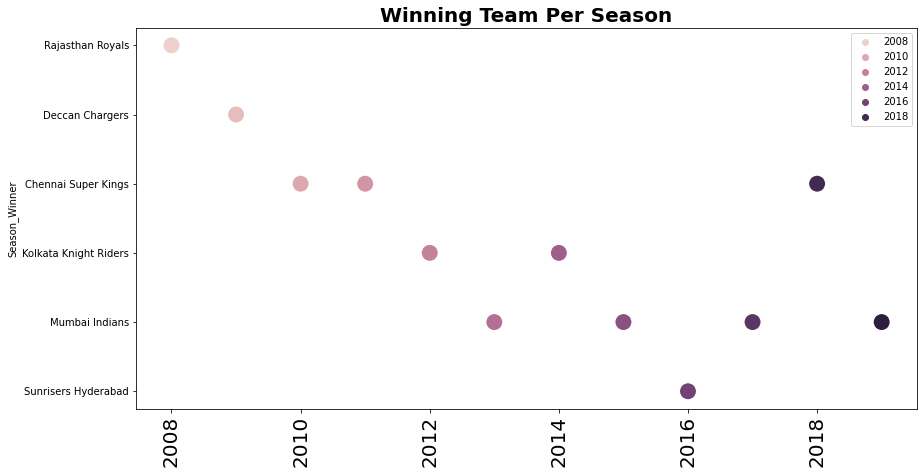

In [ ]:
plot10=plt.figure(figsize=(14,7))
plt.title("Winning Team Per Season",fontsize=20,fontweight='bold')
plt.xticks(rotation=90,size=20)
sns.scatterplot(season_winteam.index,season_winteam.Season_Winner,hue=season_winteam.index,s=300)

In [ ]:
#type(season_winteam)

## **Seasons with Most Number of Matches**

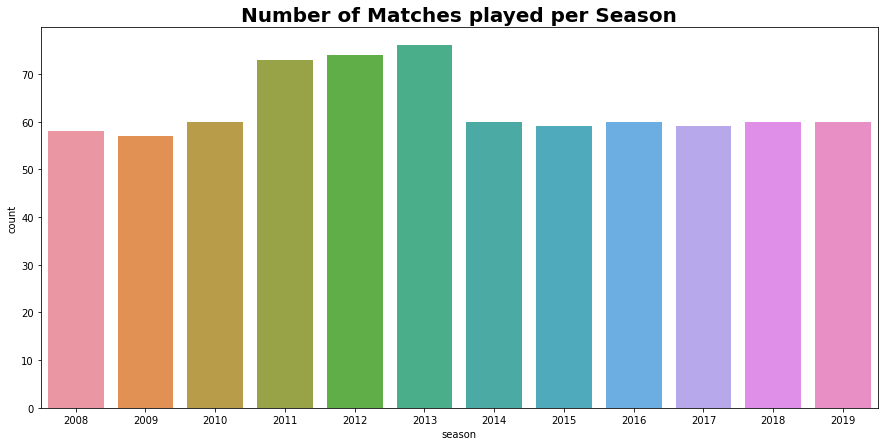

In [ ]:
plot2 = plt.figure()
plot2.set_figwidth(15)
plot2.set_figheight(7)
sns.countplot(x='season',data=df_matches)
plt.xlabel='Seasons'

plt.title('Number of Matches played per Season',fontsize=20,fontweight='bold')
  
plt.show()

## **Best Performing Players throughout the Matches**

In [ ]:
best_players=df_matches['player_of_match'].value_counts()[0:10]
best_players


CH Gayle          21
AB de Villiers    20
DA Warner         17
RG Sharma         17
MS Dhoni          17
YK Pathan         16
SR Watson         15
SK Raina          14
G Gambhir         13
V Kohli           12
Name: player_of_match, dtype: int64

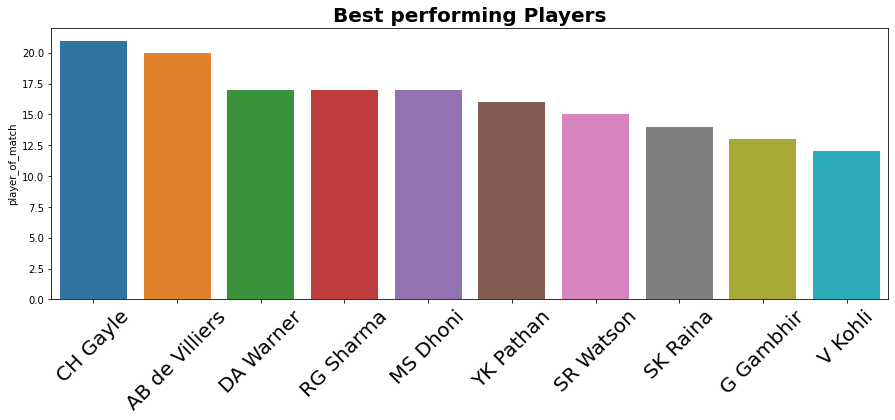

In [ ]:
plot3=plt.figure()
plot3.set_figwidth(15)
plot3.set_figheight(5)
plt.xlabel='Players'
plt.xticks(rotation=45,size=20)
plt.title('Best performing Players',fontsize=20,fontweight='bold')
sns.barplot(x=best_players.index,y=best_players)
plt.show()

## **Favourable choice of Toss Winners**

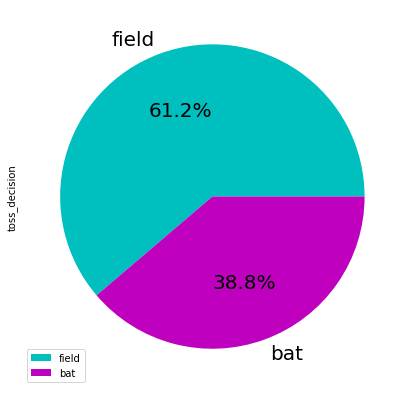

In [ ]:
plt.figure(figsize=(7,7))
df_matches['toss_decision'].value_counts().plot(kind='pie',colors='cm',fontsize=20,autopct='%3.1f%%',legend=True)

## **What does each teams choose, Batting/Fielding?**

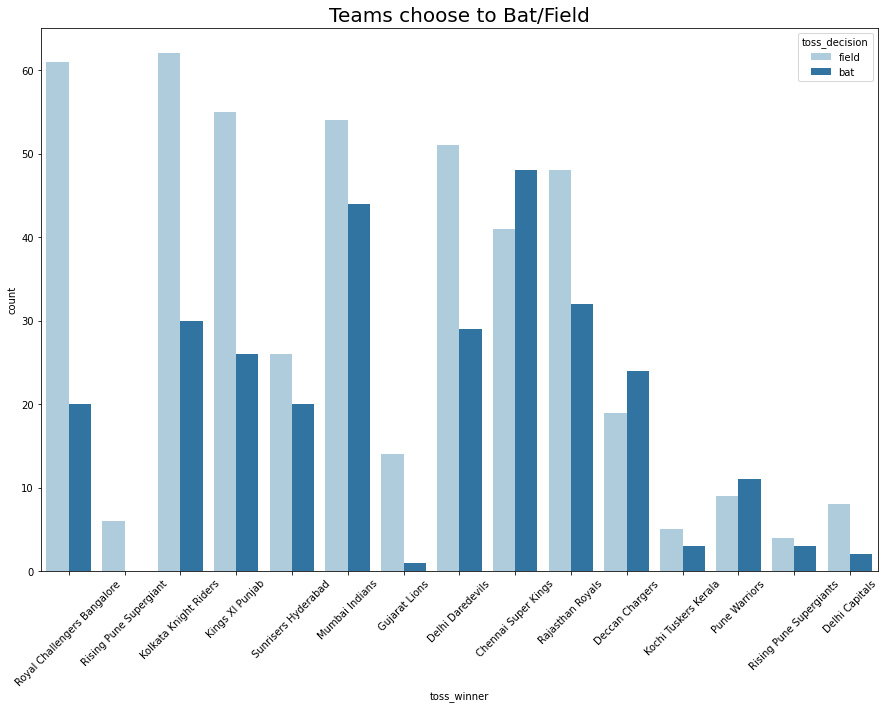

In [ ]:
plot7=plt.figure()
plot7.set_figwidth(15)
plot7.set_figheight(10)
plt.title("Teams choose to Bat/Field",fontsize=20)
sns.countplot(x='toss_winner',data=df_matches,hue='toss_decision',palette='Paired')
plt.xticks(rotation=45)
plt.show()

# **Does Toss determine Winning/Losing?**

In [ ]:
df_matches[['toss_winner','winner']].head(5)

,toss_winner,winner
0,Royal Challengers Bangalore,Sunrisers Hyderabad
1,Rising Pune Supergiant,Rising Pune Supergiant
2,Kolkata Knight Riders,Kolkata Knight Riders
3,Kings XI Punjab,Kings XI Punjab
4,Royal Challengers Bangalore,Royal Challengers Bangalore


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


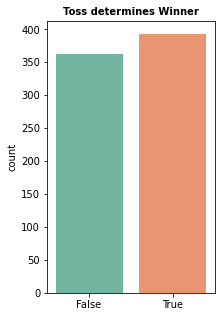

In [ ]:
plot4=plt.figure()
plot4.set_figwidth(3)
plot4.set_figheight(5)
plt.title('Toss determines Winner',fontsize=10,fontweight='bold')
sns.countplot(df_matches['toss_winner'] == df_matches['winner'],palette='Set2')
plt.show()

## **Determining the Rate of Winning of Teams**

In [ ]:
team_win_df=df_matches.groupby('winner')[['id']].count()
team_win_df=team_win_df.sort_values('id',ascending=False).reset_index()
team_win_df.rename(columns={'id':'Winning_Matches','winner':'Team'},inplace=True)
team_win_df


,Team,Winning_Matches
0,Mumbai Indians,109
1,Chennai Super Kings,100
2,Kolkata Knight Riders,92
3,Royal Challengers Bangalore,84
4,Kings XI Punjab,82
5,Rajasthan Royals,75
6,Delhi Daredevils,67
7,Sunrisers Hyderabad,58
8,Deccan Chargers,29
9,Gujarat Lions,13


In [ ]:
df_matches2=pd.concat([df_matches['team1'],df_matches['team2']])
df_matches2=df_matches2.value_counts().reset_index()
df_matches2.columns=['Team','Total_Matches']
df_matches2.set_index('Team',inplace=True)
final_df=df_matches2.merge(team_win_df,on='Team')
final_df['Winning_Rate']=(final_df.Winning_Matches/final_df.Total_Matches)*100
final_df


,Team,Total_Matches,Winning_Matches,Winning_Rate
0,Mumbai Indians,187,109,58.288770
1,Royal Challengers Bangalore,180,84,46.666667
2,Kolkata Knight Riders,178,92,51.685393
3,Kings XI Punjab,176,82,46.590909
4,Chennai Super Kings,164,100,60.975610
5,Delhi Daredevils,161,67,41.614907
6,Rajasthan Royals,147,75,51.020408
7,Sunrisers Hyderabad,108,58,53.703704
8,Deccan Chargers,75,29,38.666667
9,Pune Warriors,46,12,26.086957


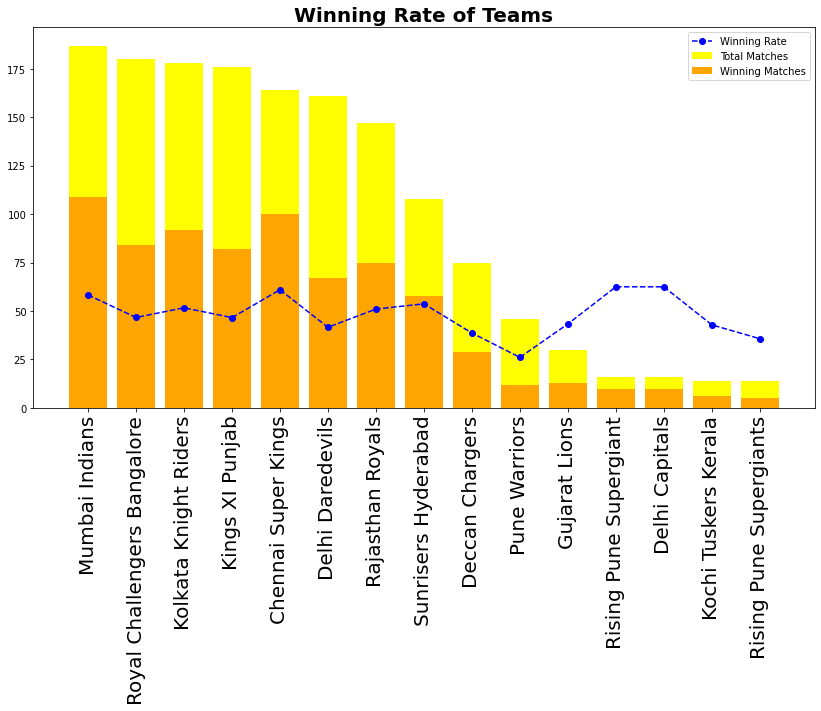

In [ ]:
plot5=plt.figure(figsize=(14,7))
plt.title('Winning Rate of Teams',fontsize=20,fontweight='bold')
plt.xticks(rotation=90,size=20)
plt.xlabel='Team'
plt.ylabel='Winning Rate'
plt.plot(final_df.Team,final_df.Winning_Rate,'o--b',color='blue')
plt.bar(final_df.Team,final_df.Total_Matches,color='yellow')
plt.bar(final_df.Team,final_df.Winning_Matches,color='orange')
plt.legend(['Winning Rate','Total Matches','Winning Matches'])
plt.show()

# Matches Won Vs Matches Played for Each Team

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


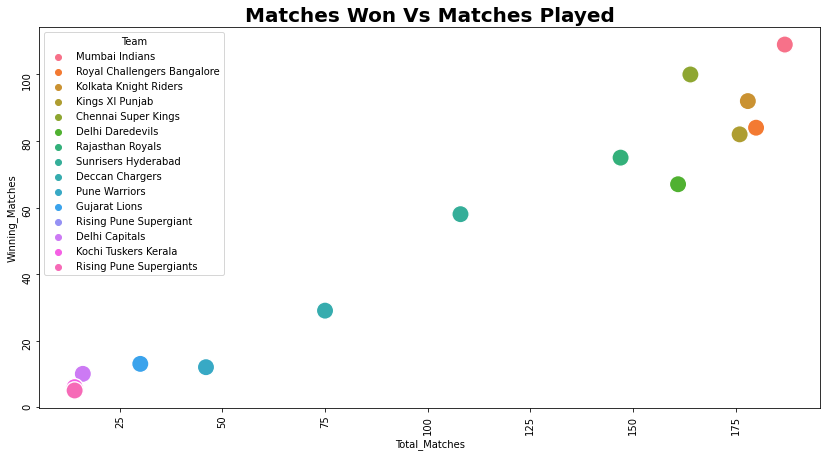

In [ ]:
plot6=plt.figure(figsize=(14,7))
plt.xlabel='Total Matches Played'
plt.ylabel='Mtches Won'
plt.title('Matches Won Vs Matches Played',fontsize=20,fontweight='bold')
plt.xticks(rotation=90)
plt.yticks(rotation=90)
sns.scatterplot(final_df.Total_Matches,final_df.Winning_Matches,hue=final_df.Team,s=300)
plt.show()


# City Hosting Matches

In [ ]:
city_host_df=df_matches.groupby('city')[['id']].count()
city_host_df=city_host_df.sort_values('id',ascending=False).reset_index()
city_host_df.rename(columns={'id':'no_of_matches_hosted'},inplace=True)
city_host_df

,city,no_of_matches_hosted
0,Mumbai,101
1,Kolkata,77
2,Delhi,74
3,Bangalore,66
4,Hyderabad,64
5,Chennai,57
6,Jaipur,47
7,Chandigarh,46
8,Pune,38
9,Durban,15


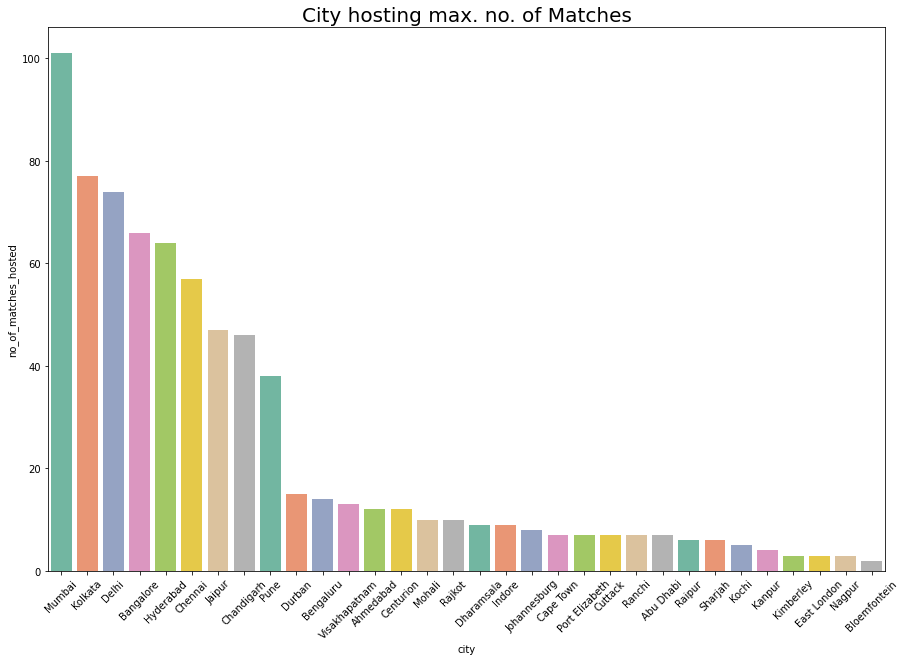

In [ ]:
plot6=plt.figure(figsize=(15,10))
plt.title('City hosting max. no. of Matches',fontsize=20)
sns.barplot(x='city',y='no_of_matches_hosted',data=city_host_df,palette='Set2')
plt.ylabel='No. of Matches Hosted'
plt.xticks(rotation=45)
plt.yticks(rotation=360)

plt.show()

## **Merging the two datasets**

In [ ]:
merged_df=pd.merge(df_delivery,df_matches,left_on='match_id',right_on='id')
merged_df.head(5)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong


# Runs Scored Over the Years

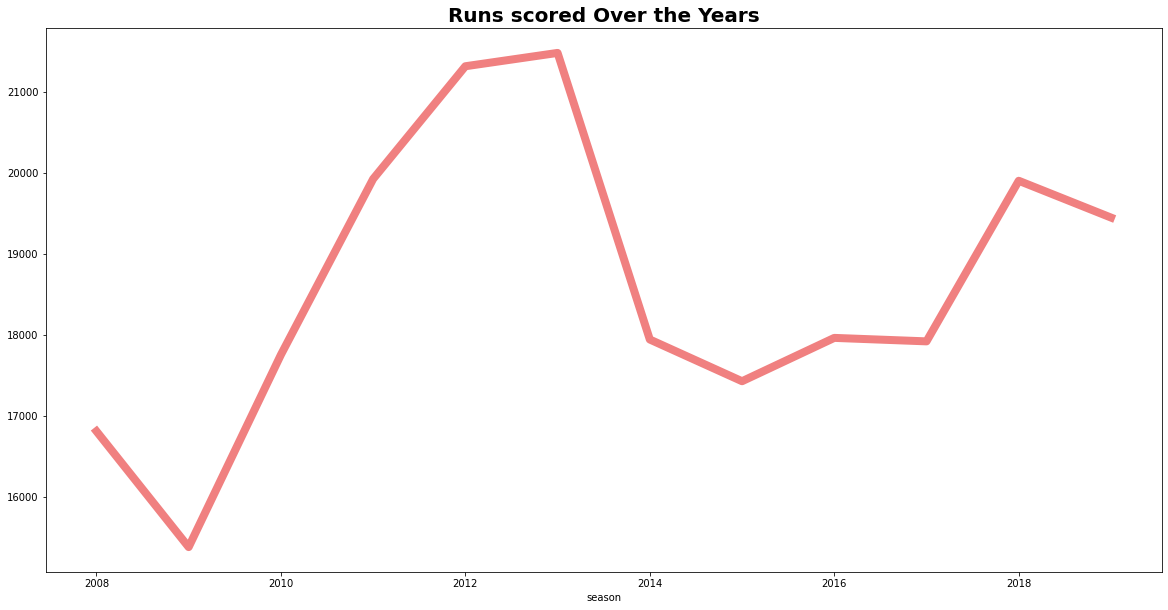

In [ ]:
merged_df.groupby('season')['batsman_runs'].sum().plot(kind='line',linewidth=8,figsize=(20,10),color='lightcoral')
plt.title("Runs scored Over the Years",fontsize=20,fontweight='bold')
plt.xlabel='Seasons'
plt.ylabel='Total Runs'

## **Maximum Run scoring Players**



(array([   0., 1000., 2000., 3000., 4000., 5000., 6000.]),
 <a list of 7 Text major ticklabel objects>)

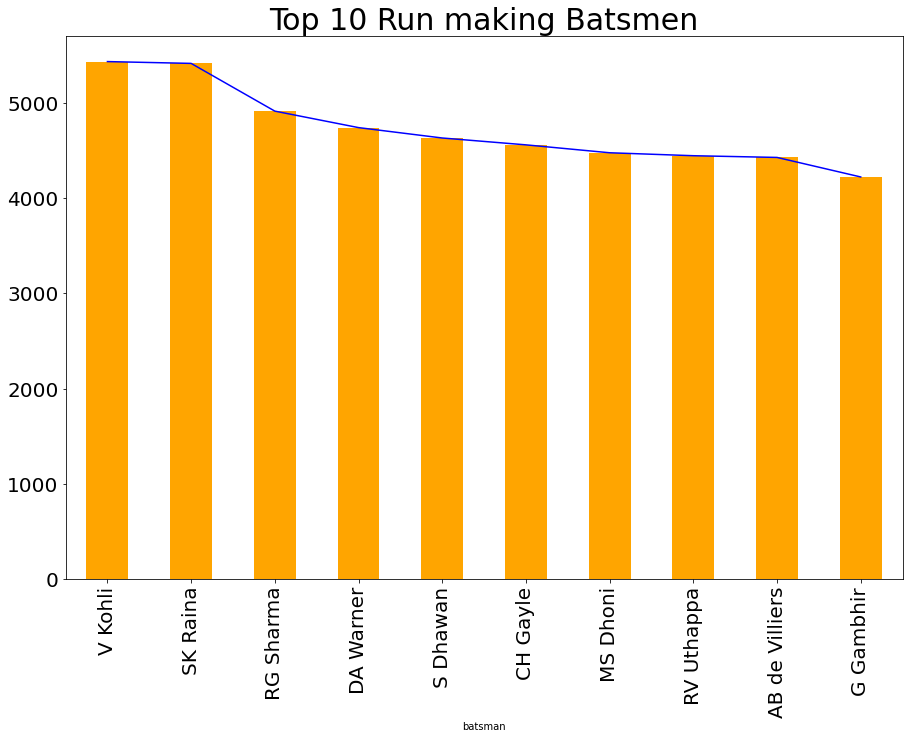

In [ ]:
merged_df.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False).head(10).plot(kind='bar',color='orange',figsize=(15,10))
merged_df.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False).head(10).plot(kind='line',color='blue',figsize=(15,10))
plt.title("Top 10 Run making Batsmen",fontsize=30)
plt.xlabel='Total runs scored'
plt.ylabel='Batsmen'
plt.xticks(rotation=90,size=20)
plt.yticks(size=20)

## **Maximum Wicket Taking Players**

(array([  0.,  25.,  50.,  75., 100., 125., 150., 175., 200.]),
 <a list of 9 Text major ticklabel objects>)

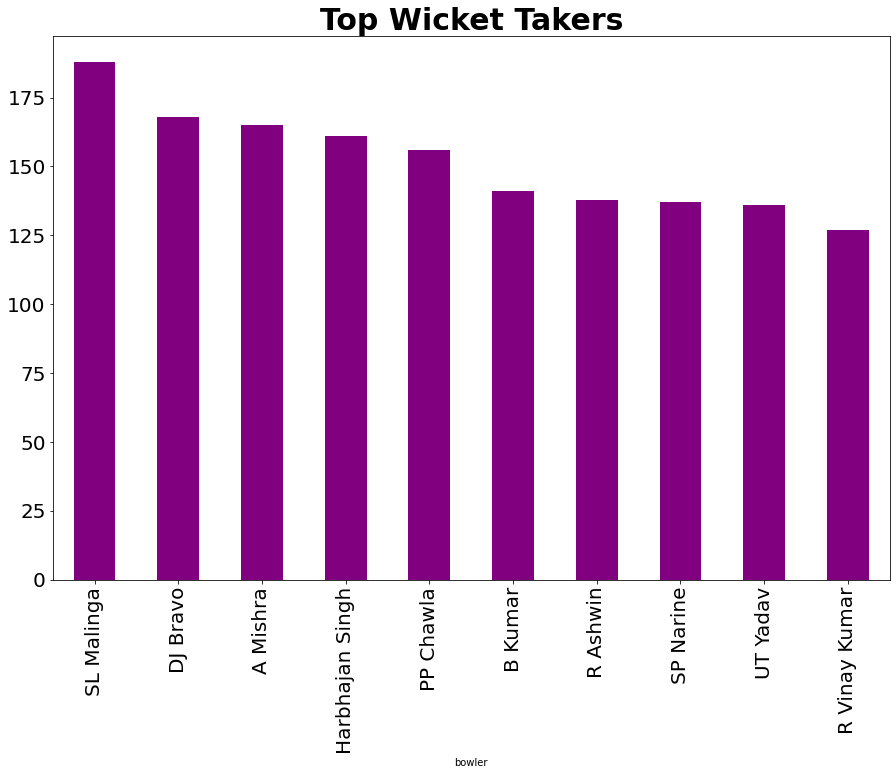

In [ ]:
merged_df.groupby('bowler')['player_dismissed'].count().sort_values(ascending = False).head(10).plot(kind = 'bar',color = 'purple', figsize = (15,10))
plt.title("Top Wicket Takers", fontsize = 30, fontweight = 'bold')
plt.xlabel="Bowlers"
plt.ylabel="Total Wickets Taken"
plt.xticks(size = 20)
plt.yticks(size = 20)

## **Top Performing Bowlers**

In [ ]:
bowler_df=df_delivery['bowler'].value_counts()[:10]
bowler_df

Harbhajan Singh    3451
A Mishra           3172
PP Chawla          3157
R Ashwin           3016
SL Malinga         2974
DJ Bravo           2711
B Kumar            2707
P Kumar            2637
UT Yadav           2605
SP Narine          2600
Name: bowler, dtype: int64

Text(0.5, 0, 'Number of Deliveries')

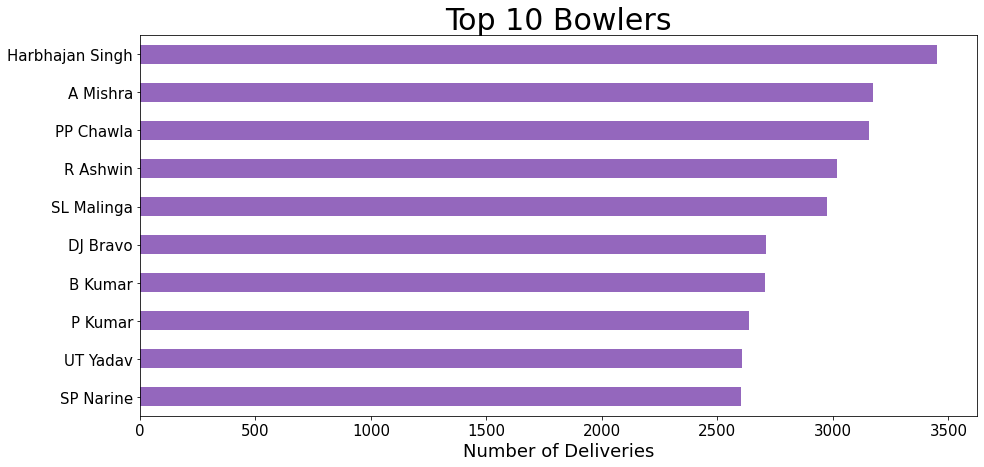

In [ ]:
plt.title("Top 10 Bowlers",fontsize=30)
plot8=bowler_df.plot(kind='barh',color='tab:purple',figsize=(15,7),fontsize=15)
plot8.invert_yaxis()
plot8.set_xlabel('Number of Deliveries',fontsize=18)


## **Most Types of Dismissal**

In [ ]:
dismiss_df=df_delivery['dismissal_kind'].value_counts()
dismiss_df

caught                   5348
bowled                   1581
run out                   852
lbw                       540
stumped                   278
caught and bowled         211
retired hurt               12
hit wicket                 10
obstructing the field       2
Name: dismissal_kind, dtype: int64

Text(0.5, 0, 'Number of Dismissal')

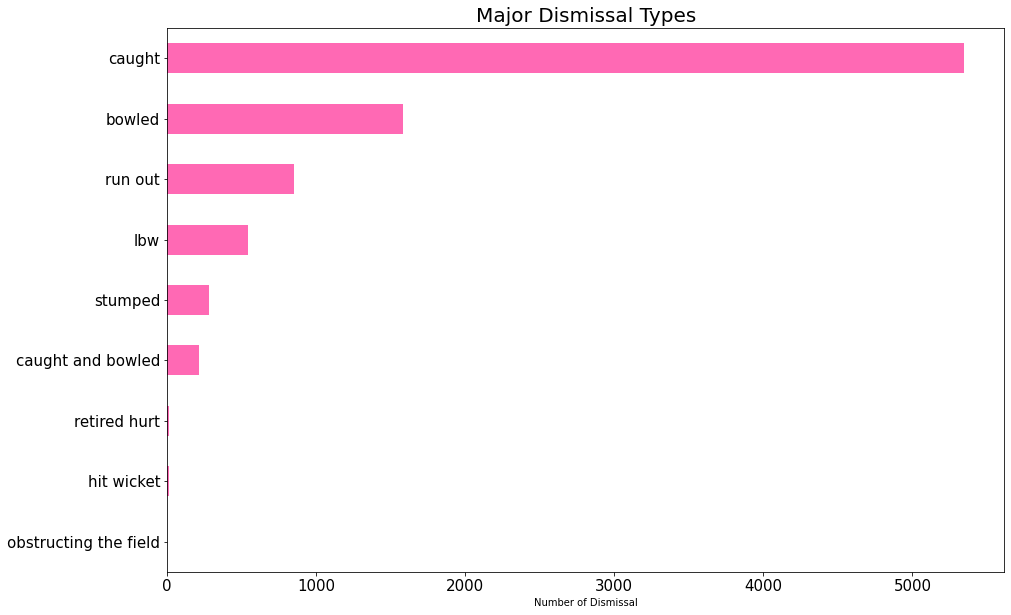

In [ ]:
plot9=dismiss_df.plot(kind='barh',figsize=(15,10),color='hotpink',fontsize=15)
plot9.invert_yaxis()
plot9.set_title("Major Dismissal Types",fontsize=20)
plot9.set_xlabel("Number of Dismissal")


## **Consistent Batsmen Over the Seasons of IPL**

In [ ]:
consistent_batsman = merged_df[merged_df.batsman.isin(['V Kohli','CH Gayle','AB de Villiers','RV Uthappa'])][['batsman','season','total_runs']]

(array([   0.,  200.,  400.,  600.,  800., 1000., 1200.]),
 <a list of 7 Text major ticklabel objects>)

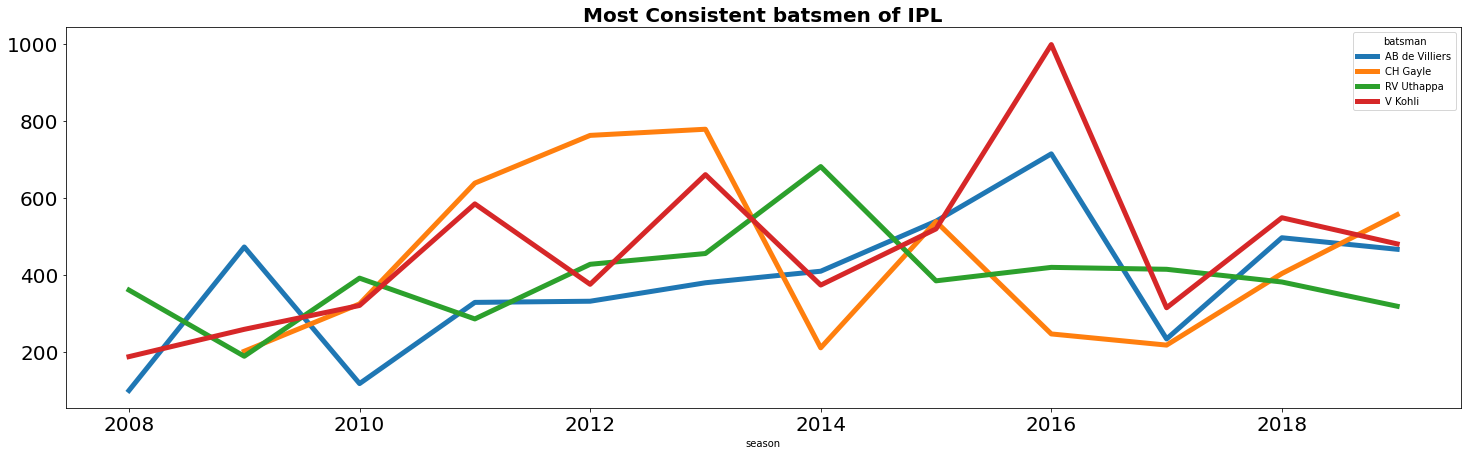

In [ ]:

consistent_batsman.groupby(['season','batsman'])['total_runs'].sum().unstack().plot(kind = 'line',linewidth=5, figsize = (25,7))
plt.title("Most Consistent batsmen of IPL", fontsize = 20, fontweight = 'bold')
plt.xlabel="Batsmen"
plt.ylabel="Total Runs Scored each season", 
plt.xticks(size = 20)
plt.yticks(size = 20)

THE END